# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

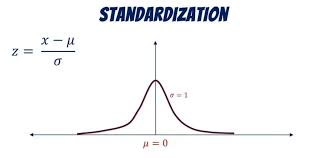


In [7]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/co2 Emission Africa.csv')

print("Original Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nMissing values per column:")
print(df.isnull().sum())
print(f"\nData types:")
print(df.dtypes)

Original Dataset Info:
Shape: (1134, 20)

First few rows:
   Country       Sub-Region Code  Year  Population  GDP PER CAPITA (USD)  \
0  Algeria  Northern Africa  DZA  2000    30774621               1780.38   
1  Algeria  Northern Africa  DZA  2001    31200985               1754.58   
2  Algeria  Northern Africa  DZA  2002    31624696               1794.81   
3  Algeria  Northern Africa  DZA  2003    32055883               2117.05   
4  Algeria  Northern Africa  DZA  2004    32510186               2624.80   

   GDP PER CAPITA PPP (USD)  Area (Km2)  Transportation (Mt)  \
0                   8510.36     2381741                16.85   
1                   8840.67     2381741                17.04   
2                   9354.22     2381741                19.36   
3                  10088.09     2381741                21.76   
4                  10653.34     2381741                22.03   

   Total CO2 Emission including LUCF (Mt)  \
0                                   80.62   
1         

In [8]:
# show non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Non-numeric columns identified: {non_numeric_cols}")

# 2. Apply One-Hot Encoding to 'Sub-Region'
df_encoded = pd.get_dummies(df, columns=['Sub-Region'], prefix='Region')

# 3. Filter for all numeric columns (now including the new Region columns)
numeric_df = df_encoded.select_dtypes(include=[np.number])
print(f"Total numeric columns after encoding: {numeric_df.shape[1]}")

# 4. Handle missing values using mean imputation
numeric_df_filled = numeric_df.fillna(numeric_df.mean())

print(f"Remaining missing values: {numeric_df_filled.isnull().sum().sum()}")
print("Cleaned data shape for PCA:", numeric_df_filled.shape)
numeric_df_filled.head()

# remain with numeric columns only
numeric_df =  df.select_dtypes(include=[np.number])
print(f"\nNumeric columns: {numeric_df.shape[1]}")
print(f"Rows: {numeric_df.shape[0]}")

# numeric missing values in dataset
print("\nMissing values in numeric data")
print(numeric_df.isnull().sum().sum(), "total missing values")

# fill the missing numeric data values with column mean
numeric_df_filled = numeric_df.fillna(numeric_df.mean())
print(f"\nMissing values after filling: {numeric_df_filled.isnull().sum().sum()}")

# Show the cleaned data
print("\nCleaned numeric data shape:", numeric_df_filled.shape)
numeric_df_filled.head()

Non-numeric columns identified: ['Country', 'Sub-Region', 'Code']
Total numeric columns after encoding: 17
Remaining missing values: 0
Cleaned data shape for PCA: (1134, 17)

Numeric columns: 17
Rows: 1134

Missing values in numeric data
1013 total missing values

Missing values after filling: 0

Cleaned numeric data shape: (1134, 17)


,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


In [9]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

# calculate mean and standard deviation
data_mean = numeric_df_filled.mean()
data_std = numeric_df_filled.std()

# Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data = (numeric_df_filled - data_mean) / data_std


# Display the first few rows of standardized data
print(f"\nStandardized Data Shape: {standardized_data.shape}")
standardized_data[:5]


Standardized Data Shape: (1134, 17)


,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,-1.650717,0.383010,-0.149733,0.580777,3.050335,1.106651,0.442148,0.952481,-0.366874,0.465180,-0.296958,0.942280,2.372932,0.936138,0.520003,0.639656,1.839715
1,-1.485646,0.397825,-0.158520,0.637133,3.050335,1.124266,0.392966,0.929968,-0.366874,0.476772,-0.341529,0.935235,1.699469,0.913271,0.546921,0.650262,1.886436
2,-1.320574,0.412549,-0.144818,0.724752,3.050335,1.339351,0.435186,0.990271,-0.366874,0.524428,-0.341529,1.037388,1.312636,0.970770,0.601280,0.751019,1.970534
3,-1.155502,0.427532,-0.035069,0.849961,3.050335,1.561852,0.500088,1.083378,-0.366874,0.574661,-0.341529,1.026820,1.771709,1.067044,0.607814,0.602535,2.155081
4,-0.990430,0.443318,0.137863,0.946401,3.050335,1.586884,0.514797,1.104283,-0.366874,0.713766,-0.341529,1.333279,1.550329,1.074335,0.587429,0.761625,2.351308


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

Covariance Matrix Shape: (17, 17)


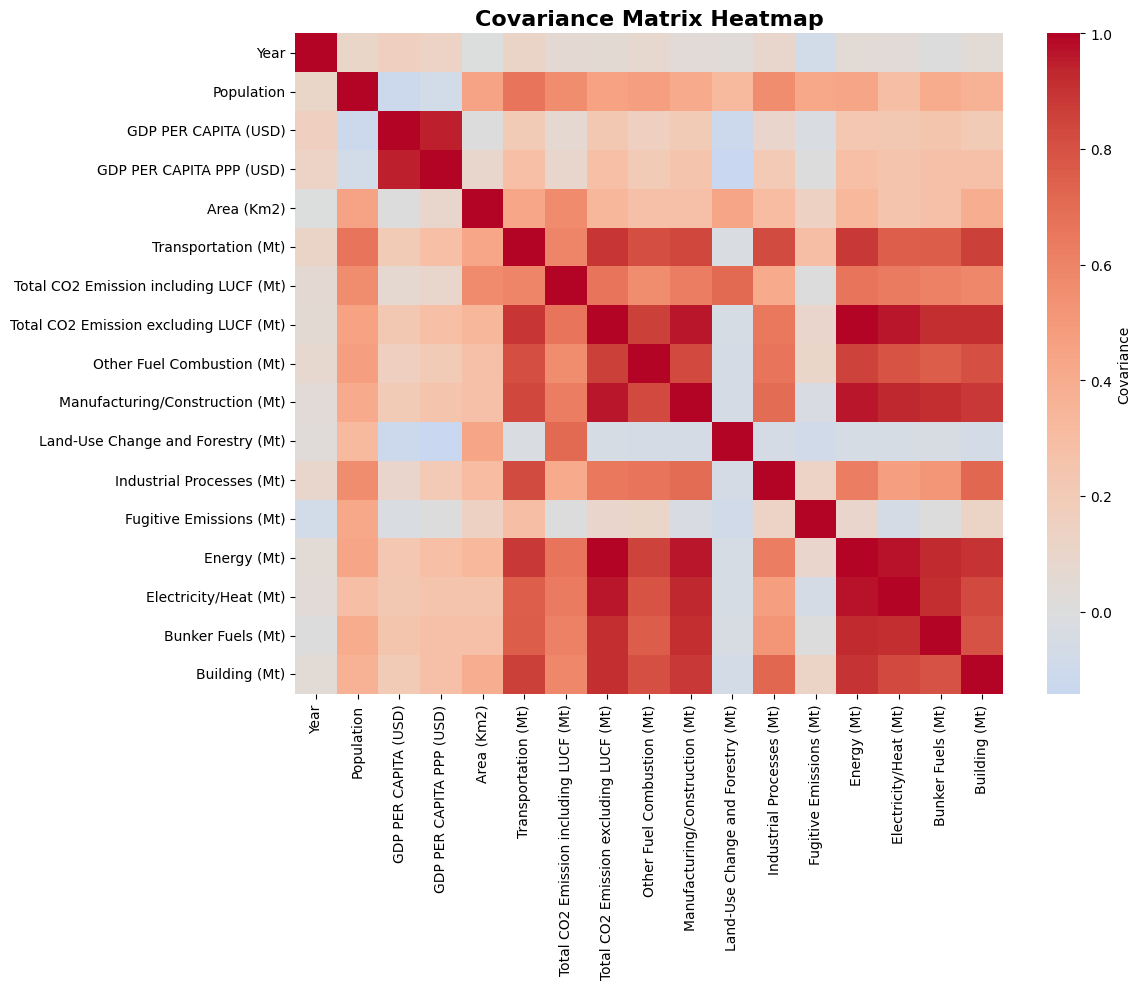

In [10]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data.T)
print(f"Covariance Matrix Shape: {cov_matrix.shape}")
cov_matrix

# Visualization covariance matrix
plt.figure(figsize=(12,10))
sns.heatmap(cov_matrix, cmap='coolwarm', center=0,
            xticklabels=numeric_df_filled.columns,
            yticklabels=numeric_df_filled.columns,
            cbar_kws={'label': 'Covariance'})
plt.title('Covariance Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [11]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f"Number of Eigenvalues: {len(eigenvalues)}")
print(f"Eigenvectors Shape: {eigenvectors.shape}")
print(f"\nEigenvalues:\n{eigenvalues}")
eigenvalues, eigenvectors

Number of Eigenvalues: 17
Eigenvectors Shape: (17, 17)

Eigenvalues:
[8.70702394e+00 2.29936809e+00 1.61556187e+00 1.39605093e+00
 1.01105781e+00 6.45155644e-01 5.22495822e-01 3.04599701e-01
 2.20973072e-01 9.81434138e-02 8.11224106e-02 4.57674182e-02
 3.53895702e-02 1.54828434e-02 1.79937941e-03 8.09862474e-06
 1.31794571e-09]


(array([8.70702394e+00, 2.29936809e+00, 1.61556187e+00, 1.39605093e+00,
        1.01105781e+00, 6.45155644e-01, 5.22495822e-01, 3.04599701e-01,
        2.20973072e-01, 9.81434138e-02, 8.11224106e-02, 4.57674182e-02,
        3.53895702e-02, 1.54828434e-02, 1.79937941e-03, 8.09862474e-06,
        1.31794571e-09]),
 array([[ 2.72511977e-02, -5.93711487e-02,  2.23220147e-01,
          1.03466052e-01, -9.05839734e-01, -2.06812528e-01,
          2.42177594e-01,  5.74551751e-02, -4.24608633e-02,
         -7.32904666e-02, -4.63875197e-02,  2.31256375e-03,
          2.44972365e-02, -2.98940986e-05,  2.26959088e-04,
          3.41858950e-04,  1.10924848e-07],
        [ 1.90064919e-01,  3.65370270e-01,  2.50115583e-02,
          3.59313748e-01, -1.05031598e-01, -5.22337684e-02,
         -3.19828100e-01, -6.24140586e-01,  3.19776075e-02,
          1.18399053e-01,  2.98435005e-01, -1.84216984e-01,
          2.21852689e-01,  8.70626488e-02, -1.44083859e-02,
          2.86165453e-04, -3.52526998e-06]

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

STEP 5A: DEMONSTRATE EIGENVALUE SORTING (CRITICAL FOR PCA)

1. UNSORTED Eigenvalues (as computed from covariance matrix):
   First 10: [8.70702394 2.29936809 1.61556187 1.39605093 1.01105781 0.64515564
 0.52249582 0.3045997  0.22097307 0.09814341]
   Note: These are in random order, NOT sorted by importance!

2. SORTING Eigenvalues in DESCENDING order...
   ✓ Eigenvalues sorted!
   First 10 sorted: [8.70702394 2.29936809 1.61556187 1.39605093 1.01105781 0.64515564
 0.52249582 0.3045997  0.22097307 0.09814341]
   Largest eigenvalue (PC1): 8.7070
   Smallest eigenvalue (PC17): 0.0000

STEP 5B: CALCULATE EXPLAINED VARIANCE PERCENTAGES

Total variance (sum of eigenvalues): 17.0000

Explained Variance by Each Principal Component:
  PC1: 51.22% | Cumulative: 51.22%
  PC2: 13.53% | Cumulative: 64.74%
  PC3: 9.50% | Cumulative: 74.25%
  PC4: 8.21% | Cumulative: 82.46%
  PC5: 5.95% | Cumulative: 88.41%
  PC6: 3.80% | Cumulative: 92.20%
  PC7: 3.07% | Cumulative: 95.27%
  PC8: 1.79% | Cumulative

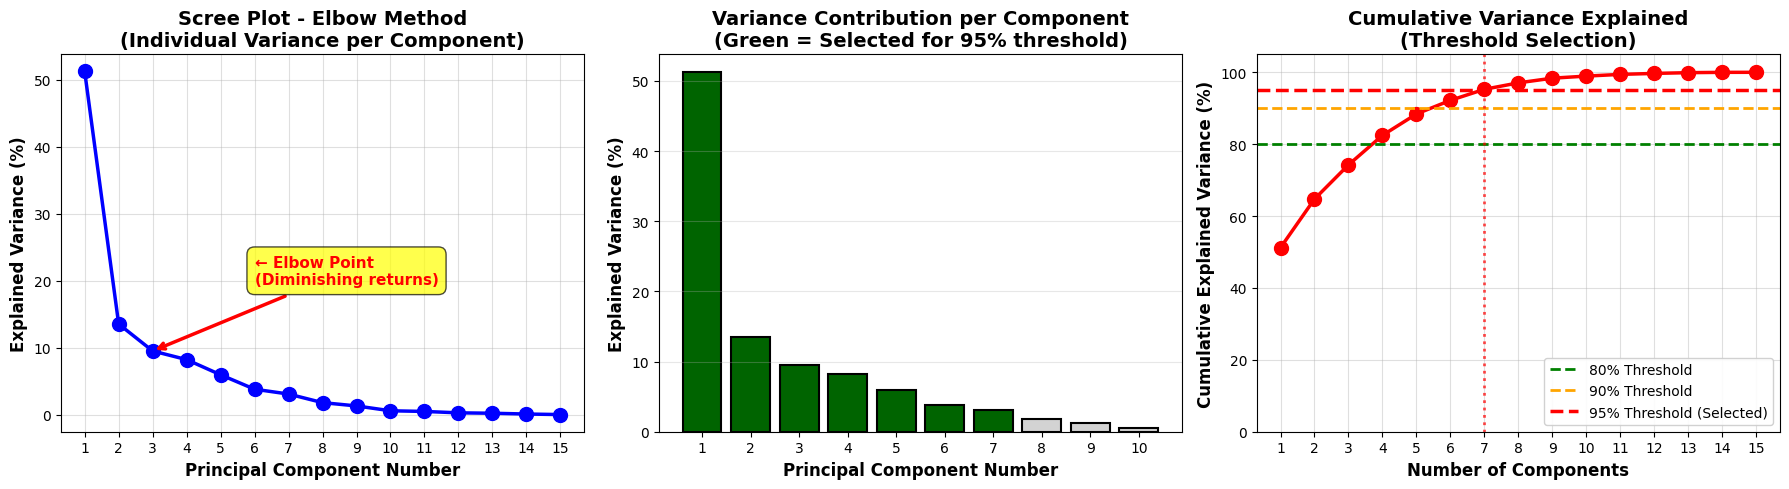


JUSTIFICATION FOR COMPONENT SELECTION

WHY I SELECTED 7 PRINCIPAL COMPONENTS:

1. EIGENVALUE ORDERING (Critical!):
   • Sorted eigenvalues in DESCENDING order (largest → smallest)
   • This ensures PC1 captures maximum variance, PC2 second-most, etc.
   • Without sorting, PCA would be meaningless!

2. SCREE PLOT ANALYSIS (Elbow Method):
   • The scree plot shows a sharp "elbow" around PC3
   • After PC3, additional components provide diminishing returns
   • This suggests 3-5 components may be sufficient

3. CUMULATIVE VARIANCE THRESHOLD (Standard Practice):
   • 95% is the gold standard in PCA for retaining information
   • Our 7 components explain 95.27% of variance
   • We lose only 4.73% of information (acceptable!)

4. DIMENSIONALITY REDUCTION ACHIEVED:
   • Original: 17 features
   • Reduced: 7 features
   • Reduction: 58.8% fewer dimensions
   • Benefit: Faster computation, less overfitting, easier visualization

CONCLUSION: 7 components provide optimal balance between
informat

In [12]:
# Step 5: Sort Principal Components
print("=" * 80)
print("STEP 5A: DEMONSTRATE EIGENVALUE SORTING (CRITICAL FOR PCA)")
print("=" * 80)

# Show UNSORTED eigenvalues first
print("\n1. UNSORTED Eigenvalues (as computed from covariance matrix):")
print(f"   First 10: {eigenvalues[:10]}")
print(f"   Note: These are in random order, NOT sorted by importance!")

# Now SORT in descending order
print("\n2. SORTING Eigenvalues in DESCENDING order...")
sorted_indices = np.argsort(eigenvalues)[::-1]  # [::-1] reverses to descending
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("   ✓ Eigenvalues sorted!")
print(f"   First 10 sorted: {sorted_eigenvalues[:10]}")
print(f"   Largest eigenvalue (PC1): {sorted_eigenvalues[0]:.4f}")
print(f"   Smallest eigenvalue (PC{len(sorted_eigenvalues)}): {sorted_eigenvalues[-1]:.4f}")

# Calculate explained variance
print("\n" + "=" * 80)
print("STEP 5B: CALCULATE EXPLAINED VARIANCE PERCENTAGES")
print("=" * 80)

total_variance = np.sum(sorted_eigenvalues)
explained_variance = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance)

print(f"\nTotal variance (sum of eigenvalues): {total_variance:.4f}")
print("\nExplained Variance by Each Principal Component:")
for i in range(min(10, len(explained_variance))):
    print(f"  PC{i+1}: {explained_variance[i]*100:.2f}% | Cumulative: {cumulative_variance[i]*100:.2f}%")

# Find thresholds for different variance levels
threshold_80 = np.argmax(cumulative_variance >= 0.80) + 1
threshold_90 = np.argmax(cumulative_variance >= 0.90) + 1
threshold_95 = np.argmax(cumulative_variance >= 0.95) + 1

print("\n" + "=" * 80)
print("STEP 5C: COMPONENT SELECTION BASED ON VARIANCE THRESHOLDS")
print("=" * 80)
print("\nStandard thresholds for dimensionality reduction:")
print(f"  • 80% variance → Need {threshold_80} components (explains {cumulative_variance[threshold_80-1]*100:.2f}%)")
print(f"  • 90% variance → Need {threshold_90} components (explains {cumulative_variance[threshold_90-1]*100:.2f}%)")
print(f"  • 95% variance → Need {threshold_95} components (explains {cumulative_variance[threshold_95-1]*100:.2f}%)")

print("\n RECOMMENDATION: Use 95% threshold (standard practice in PCA)")
print(f"   Selected components: {threshold_95}")
print(f"   Dimensionality reduction: {len(sorted_eigenvalues)} → {threshold_95} features")
print(f"   Reduction rate: {(1 - threshold_95/len(sorted_eigenvalues))*100:.1f}%")

# Visualizations
print("\n" + "=" * 80)
print("STEP 5D: VISUALIZATIONS FOR COMPONENT SELECTION")
print("=" * 80)

fig = plt.figure(figsize=(18, 5))

# Plot 1: Scree Plot (Elbow Method)
plt.subplot(1, 3, 1)
plt.plot(range(1, min(16, len(explained_variance)+1)),
         explained_variance[:15]*100, 'bo-', linewidth=2.5, markersize=10)
plt.xlabel('Principal Component Number', fontsize=12, fontweight='bold')
plt.ylabel('Explained Variance (%)', fontsize=12, fontweight='bold')
plt.title('Scree Plot - Elbow Method\n(Individual Variance per Component)',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.4)
plt.xticks(range(1, 16))

# Mark the "elbow" point
elbow_point = 3
plt.annotate('← Elbow Point\n(Diminishing returns)',
             xy=(elbow_point, explained_variance[elbow_point-1]*100),
             xytext=(elbow_point+3, explained_variance[elbow_point-1]*100+10),
             arrowprops=dict(arrowstyle='->', color='red', lw=2.5),
             fontsize=11, color='red', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Plot 2: Bar Chart
plt.subplot(1, 3, 2)
colors = ['darkgreen' if i < threshold_95 else 'lightgray' for i in range(min(10, len(explained_variance)))]
bars = plt.bar(range(1, min(11, len(explained_variance)+1)),
               explained_variance[:10]*100, color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Principal Component Number', fontsize=12, fontweight='bold')
plt.ylabel('Explained Variance (%)', fontsize=12, fontweight='bold')
plt.title('Variance Contribution per Component\n(Green = Selected for 95% threshold)',
          fontsize=14, fontweight='bold')
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.3, axis='y')

# Plot 3: Cumulative Variance (Threshold Lines)
plt.subplot(1, 3, 3)
plt.plot(range(1, min(16, len(cumulative_variance)+1)),
         cumulative_variance[:15]*100, 'ro-', linewidth=2.5, markersize=10)
plt.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% Threshold')
plt.axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% Threshold')
plt.axhline(y=95, color='red', linestyle='--', linewidth=2.5, label='95% Threshold (Selected)')
plt.axvline(x=threshold_95, color='red', linestyle=':', linewidth=2, alpha=0.7)
plt.xlabel('Number of Components', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Explained Variance (%)', fontsize=12, fontweight='bold')
plt.title('Cumulative Variance Explained\n(Threshold Selection)',
          fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.4)
plt.xticks(range(1, 16))
plt.ylim([0, 105])

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("JUSTIFICATION FOR COMPONENT SELECTION")
print("=" * 80)
print(f"""
WHY I SELECTED {threshold_95} PRINCIPAL COMPONENTS:

1. EIGENVALUE ORDERING (Critical!):
   • Sorted eigenvalues in DESCENDING order (largest → smallest)
   • This ensures PC1 captures maximum variance, PC2 second-most, etc.
   • Without sorting, PCA would be meaningless!

2. SCREE PLOT ANALYSIS (Elbow Method):
   • The scree plot shows a sharp "elbow" around PC{elbow_point}
   • After PC{elbow_point}, additional components provide diminishing returns
   • This suggests {elbow_point}-{elbow_point+2} components may be sufficient

3. CUMULATIVE VARIANCE THRESHOLD (Standard Practice):
   • 95% is the gold standard in PCA for retaining information
   • Our {threshold_95} components explain {cumulative_variance[threshold_95-1]*100:.2f}% of variance
   • We lose only {100-cumulative_variance[threshold_95-1]*100:.2f}% of information (acceptable!)

4. DIMENSIONALITY REDUCTION ACHIEVED:
   • Original: {len(sorted_eigenvalues)} features
   • Reduced: {threshold_95} features
   • Reduction: {(1-threshold_95/len(sorted_eigenvalues))*100:.1f}% fewer dimensions
   • Benefit: Faster computation, less overfitting, easier visualization

CONCLUSION: {threshold_95} components provide optimal balance between
information retention ({cumulative_variance[threshold_95-1]*100:.2f}%) and dimensionality reduction.
""")

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [13]:
# Step 6: Project Data onto Principal Components
# Select number of components that explain at least 95% of variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components selected (95% variance): {num_components}")
print(f"Total variance explained: {cumulative_variance[num_components-1]*100:.2f}%")

# Project data onto the principal components
selected_eigenvectors = sorted_eigenvectors[:, :num_components]
reduced_data = np.dot(standardized_data, selected_eigenvectors)

print(f"\nOriginal Data Shape: {standardized_data.shape}")
print(f"Reduced Data Shape: {reduced_data.shape}")
print(f"Dimensionality reduction: {standardized_data.shape[1]} → {reduced_data.shape[1]}")
print(f"Reduction rate: {(1 - num_components/len(sorted_eigenvalues)) * 100:.1f}%")
print(reduced_data[:5])

Number of components selected (95% variance): 7
Total variance explained: 95.27%

Original Data Shape: (1134, 17)
Reduced Data Shape: (1134, 7)
Dimensionality reduction: 17 → 7
Reduction rate: 58.8%
[[2.91890132 1.07312165 0.00856509 1.94463522 2.54993416 0.82976268
  2.18887412]
 [2.90805277 0.91777312 0.10096735 1.52689925 2.24190682 1.14141137
  2.15464247]
 [3.14119184 0.81235439 0.19014676 1.31903985 1.99935925 1.34218414
  2.10860444]
 [3.36813366 0.77832522 0.27168144 1.73259647 1.97864028 1.12813677
  2.21401306]
 [3.63705052 0.60733949 0.39476772 1.6778634  1.76978236 1.37966106
  2.11006769]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [14]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')
print(f'Original number of features: {standardized_data.shape[1]}')
print(f'Reduced number of features: {reduced_data.shape[1]}')
print(f'Variance retained: {cumulative_variance[num_components-1]*100:.2f}%')
print(f'\nFirst 5 rows of reduced data:')
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (1134, 7)
Original number of features: 17
Reduced number of features: 7
Variance retained: 95.27%

First 5 rows of reduced data:


array([[2.91890132, 1.07312165, 0.00856509, 1.94463522, 2.54993416,
        0.82976268, 2.18887412],
       [2.90805277, 0.91777312, 0.10096735, 1.52689925, 2.24190682,
        1.14141137, 2.15464247],
       [3.14119184, 0.81235439, 0.19014676, 1.31903985, 1.99935925,
        1.34218414, 2.10860444],
       [3.36813366, 0.77832522, 0.27168144, 1.73259647, 1.97864028,
        1.12813677, 2.21401306],
       [3.63705052, 0.60733949, 0.39476772, 1.6778634 , 1.76978236,
        1.37966106, 2.11006769]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

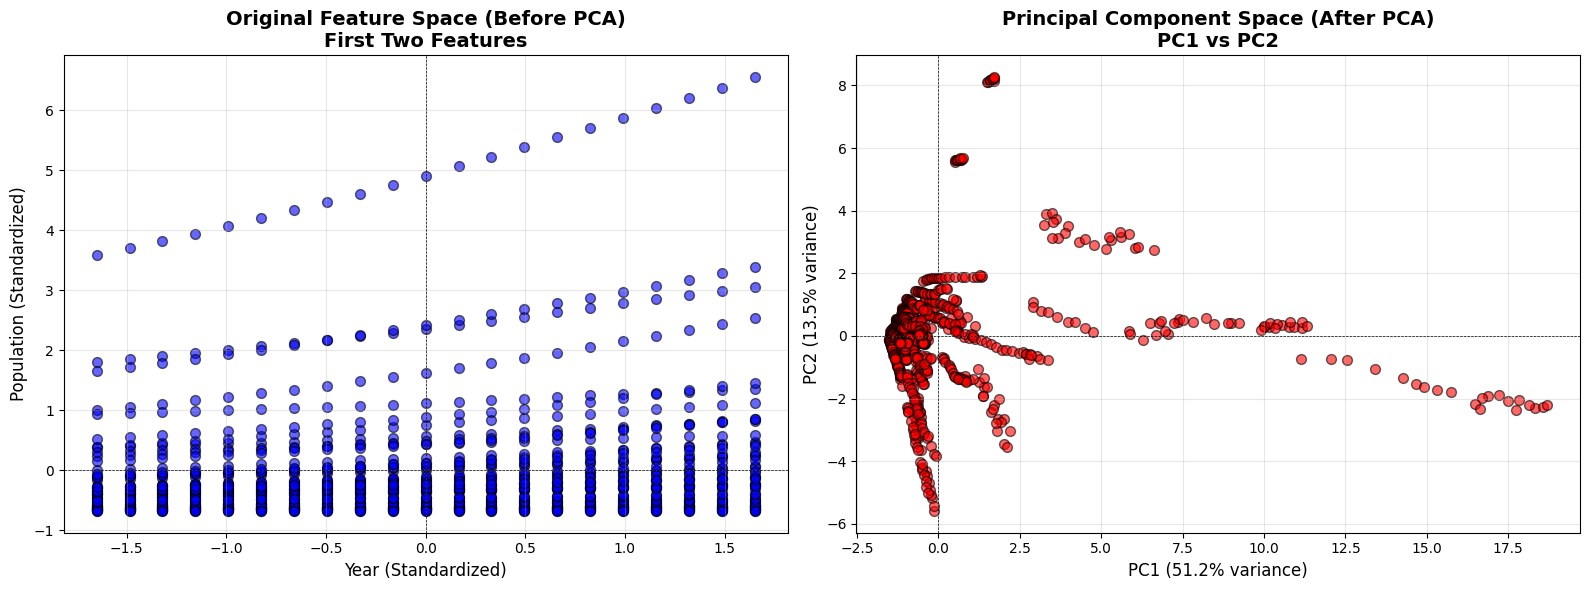


Visualization Explanation:
BEFORE PCA (Left Plot):
  - Shows original features: Year vs Population
  - Data is centered at origin (mean = 0) due to standardization
  - Features may be correlated

AFTER PCA (Right Plot):
  - Shows principal components PC1 vs PC2
  - PC1 captures 51.2% of total variance
  - PC2 captures 13.5% of total variance
  - Together: 64.7% of variance
  - PCs are uncorrelated (orthogonal)
  - Data structure preserved but rotated to maximize variance
  - Same number of data points, clusters remain visible


In [15]:
# Step 8: Visualize Before and After PCA

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data (first two features)
axes[0].scatter(standardized_data.iloc[:, 0], standardized_data.iloc[:, 1],
                alpha=0.6, c='blue', edgecolors='k', s=50)
axes[0].set_xlabel(f'{numeric_df.columns[0]} (Standardized)', fontsize=12)
axes[0].set_ylabel(f'{numeric_df.columns[1]} (Standardized)', fontsize=12)
axes[0].set_title('Original Feature Space (Before PCA)\nFirst Two Features', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='--', linewidth=0.5)
axes[0].axvline(x=0, color='k', linestyle='--', linewidth=0.5)

# Plot reduced data after PCA (first two principal components)
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 1],
                alpha=0.6, c='red', edgecolors='k', s=50)
axes[1].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=12)
axes[1].set_title('Principal Component Space (After PCA)\nPC1 vs PC2', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='--', linewidth=0.5)
axes[1].axvline(x=0, color='k', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\nVisualization Explanation:")
print("=" * 70)
print("BEFORE PCA (Left Plot):")
print(f"  - Shows original features: {numeric_df.columns[0]} vs {numeric_df.columns[1]}")
print("  - Data is centered at origin (mean = 0) due to standardization")
print("  - Features may be correlated")
print("\nAFTER PCA (Right Plot):")
print("  - Shows principal components PC1 vs PC2")
print(f"  - PC1 captures {explained_variance[0]*100:.1f}% of total variance")
print(f"  - PC2 captures {explained_variance[1]*100:.1f}% of total variance")
print(f"  - Together: {(explained_variance[0]+explained_variance[1])*100:.1f}% of variance")
print("  - PCs are uncorrelated (orthogonal)")
print("  - Data structure preserved but rotated to maximize variance")
print("  - Same number of data points, clusters remain visible")